In [33]:
import numpy as np

from astropy.table import Table
from astropy.io import fits

from astroquery.mast import Observations

# For matplotlib plotting
import matplotlib
%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# For animation display
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')

from astronify.series import SoniSeries

In [2]:
def start_plot(x,y):
    
    fig, ax = plt.subplots(figsize=(12,8), facecolor="black", dpi=150)
    ax.set_facecolor('black')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Flux", fontsize=24, color="white")
    ax.set_ylabel("Wavelength", fontsize=24, color="white")
    
    ax.plot(x,y, color="white",  linewidth=2)
    
    xmin,xmax = ax.get_xlim()
    ax.set_xlim(xmin,xmax)
    ymin,ymax = ax.get_ylim()
    ax.set_ylim(ymin,ymax)
    
    return fig, ax

In [28]:
def make_animation(fig, ax, x_range, scaling, delay=100, save=False, filename=None):
    """
    Function that takes an array where each frame is a 2D image array and make an animated plot
    that runs through the frames.
    
    Note: This can take a long time to run if you have a lot of frames.    
    Parameters
    ----------
    data_array : array
        Array of 2D images.
    start_frame : int
        The index of the initial frame to show. Default is the first frame.
    end_frame : int
        The index of the final frame to show. Default is the last frame.
    vmin : float
        Data range min for the colormap. Defaults to data minimum value.
    vmax : float
        Data range max for the colormap. Defaults to data maximum value.
    delay: 
        Delay before the next frame is shown in milliseconds.

    Returns
    -------
    response : `animation.FuncAnimation`
    """

    min_val = x_range[0]
    num_frames = int((x_range[1] - min_val)/(delay/1000)/scaling)+2
    
      
    def animate(i, fig, ax):
        """Function used to update the animation"""
        if len(ax.lines) == 1:
            ln = ax.axvline(min_val + i*(delay/1000)*scaling, linestyle="--", color="#cf005b", linewidth=5)
        else:
            ln = ax.lines[1]
            ln.set_data([min_val + i*(delay/1000)*scaling, min_val + i*(delay/1000)*scaling], [0, 1])
        return ln,

    ani = animation.FuncAnimation(fig, animate, fargs=(fig, ax), frames=num_frames, interval=delay, blit=False)
    plt.close()
    
    if save:
        if not filename:
            filename="animation"
        ani.save(f"{filename}.gif")
    else:
        return ani

In [45]:
jwst_obs = Observations.query_criteria(obs_collection="JWST", obs_id="jw02738-o002_s00443_niriss_f200w-gr150c-gr150r")
jwst_prods = Observations.get_product_list(jwst_obs)
jwst_manifest = Observations.download_products(jwst_prods, extension="c1d.fits")


In [4]:
niriss_fits = fits.open(jwst_manifest["Local Path"][0])

In [48]:
niriss_dat = Table.read(niriss_fits[1])

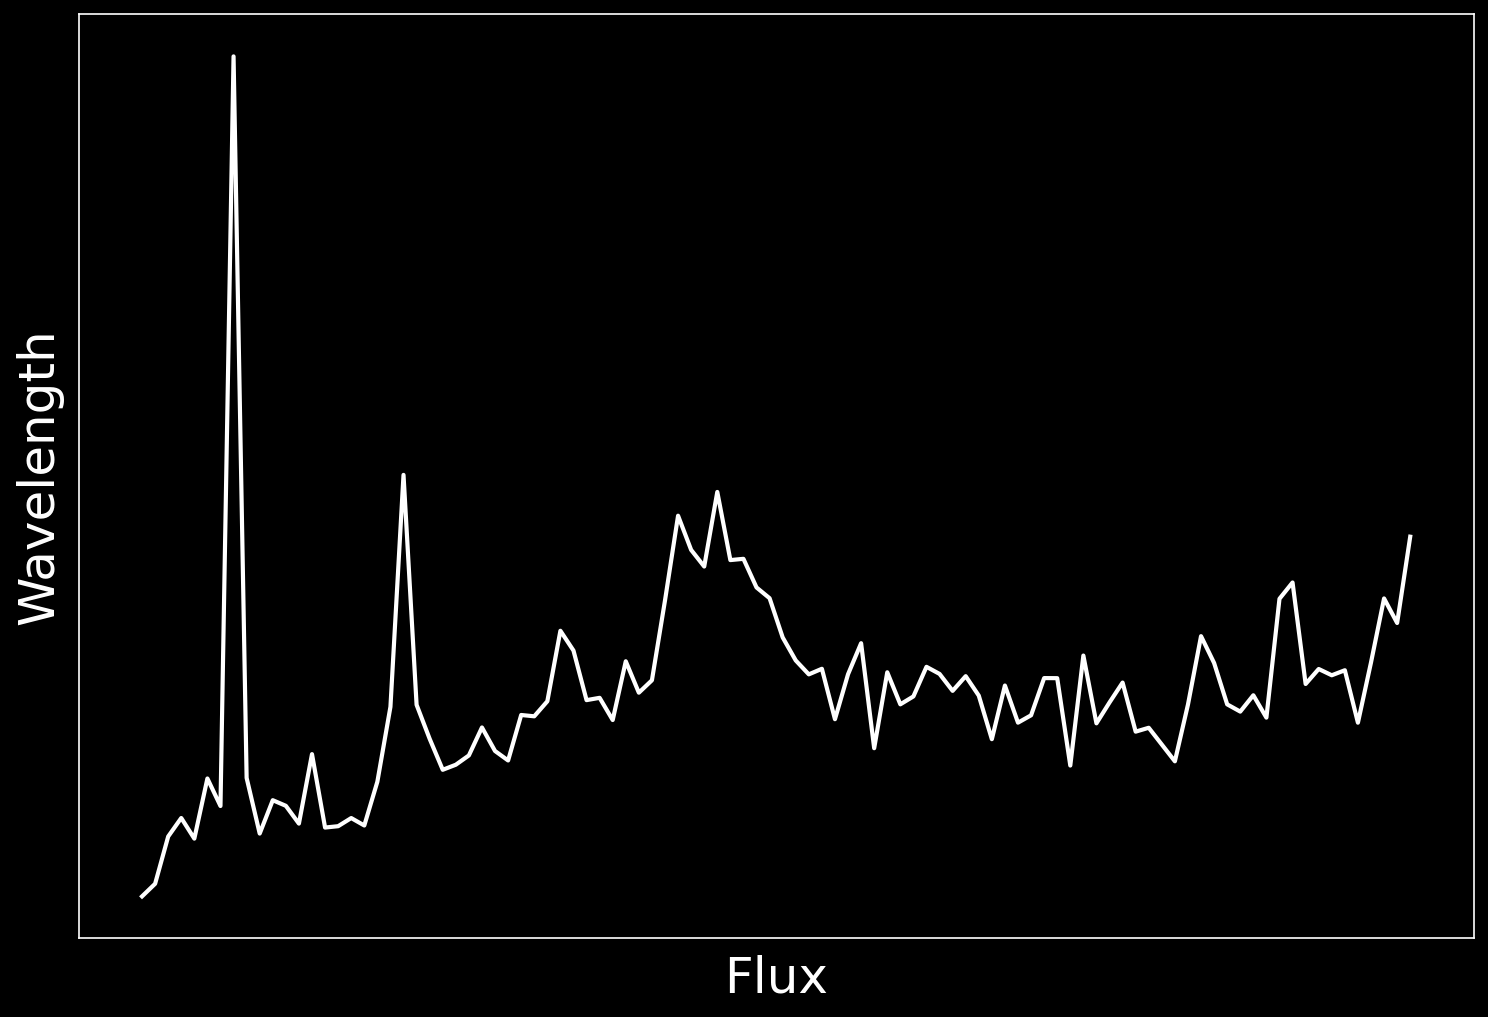

In [49]:
fig, ax = start_plot(niriss_dat['WAVELENGTH'], niriss_dat['FLUX'])

In [8]:
niriss_obj = SoniSeries(niriss_dat, time_col="WAVELENGTH", val_col="FLUX")

niriss_obj.note_spacing = 0.05
niriss_obj.note_duration = 0.2

niriss_obj.sonify()

/opt/anaconda3/envs/sonification-3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [79]:
niriss_obj.play()

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [80]:
niriss_obj.write("niriss.wav")

Pyo message: Offline Server rendering file niriss.wav dur=5.049998
Pyo message: Offline Server rendering finished.


In [32]:
make_animation(fig,ax, [np.min(niriss_dat['WAVELENGTH']),np.max(niriss_dat['WAVELENGTH'])],
               niriss_obj.data.meta["asf_exposure_time"]/niriss_obj.data.meta["asf_spacing"], 200,
               save=True, filename="niriss")

MovieWriter ffmpeg unavailable; using Pillow instead.
